<a href="https://colab.research.google.com/github/siddheshabhang/Obesity-Risk-Classifier/blob/abhinav/ML_ProjectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
url = "https://raw.githubusercontent.com/siddheshabhang/Obesity-Risk-Classifier/master/Obesity_Risk%20Dataset/train.csv"
train_df = pd.read_csv(url)

url2 = "https://raw.githubusercontent.com/siddheshabhang/Obesity-Risk-Classifier/d3da3b9935687478f9039ed9773199f505e55f3d/Obesity_Risk%20Dataset/test.csv"
test_df = pd.read_csv(url2)
test_ids = test_df['id']


In [ ]:
print(train_df.shape)
train_df.info()

(15533, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  int64  
 1   Gender                          15533 non-null  object 
 2   Age                             15533 non-null  float64
 3   Height                          15533 non-null  float64
 4   Weight                          15533 non-null  float64
 5   family_history_with_overweight  15533 non-null  object 
 6   FAVC                            15533 non-null  object 
 7   FCVC                            15533 non-null  float64
 8   NCP                             15533 non-null  float64
 9   CAEC                            15533 non-null  object 
 10  SMOKE                           15533 non-null  object 
 11  CH2O                            15533 non-null  float64
 12  SCC                 

In [ ]:
print(test_df.shape)
test_df.info()

(5225, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5225 non-null   int64  
 1   Gender                          5225 non-null   object 
 2   Age                             5225 non-null   float64
 3   Height                          5225 non-null   float64
 4   Weight                          5225 non-null   float64
 5   family_history_with_overweight  5225 non-null   object 
 6   FAVC                            5225 non-null   object 
 7   FCVC                            5225 non-null   float64
 8   NCP                             5225 non-null   float64
 9   CAEC                            5225 non-null   object 
 10  SMOKE                           5225 non-null   object 
 11  CH2O                            5225 non-null   float64
 12  SCC                    

# **Splitting Numerical and Categorical Columns**

In [ ]:
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                    'SMOKE', 'SCC', 'CALC', 'MTRANS']
target_column = 'WeightCategory'

# **Encoding**

Train Data

In [ ]:
#Binary Encoding
train_df['Gender'] = train_df['Gender'].map({'Male': 1, 'Female': 0})
train_df['family_history_with_overweight'] = train_df['family_history_with_overweight'].map({'yes': 1, 'no': 0})
train_df['FAVC'] = train_df['FAVC'].map({'yes': 1, 'no': 0})
train_df['SMOKE'] = train_df['SMOKE'].map({'yes': 1, 'no': 0})
train_df['SCC'] = train_df['SCC'].map({'yes': 1, 'no': 0})
display(train_df.head())

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#OneHot Encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
cols_to_encode = ['CAEC', 'CALC', 'MTRANS']

encoded_array = encoder.fit_transform(train_df[cols_to_encode])
encoded_feature_names = encoder.get_feature_names_out(cols_to_encode)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_feature_names, index=train_df.index)

train_df = train_df.drop(columns=cols_to_encode)
train_df = pd.concat([train_df, encoded_df], axis=1)

display(train_df.head())

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,...,WeightCategory,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0,...,Overweight_Level_II,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,0,...,Normal_Weight,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0,...,Insufficient_Weight,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,0,...,Obesity_Type_III,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,0,...,Overweight_Level_II,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Test Data

In [ ]:
test_copy = test_df.copy()

In [ ]:
#Binary Encoding
test_copy['Gender'] = test_copy['Gender'].map({'Male': 1, 'Female': 0})
test_copy['family_history_with_overweight'] = test_copy['family_history_with_overweight'].map({'yes': 1, 'no': 0})
test_copy['FAVC'] = test_copy['FAVC'].map({'yes': 1, 'no': 0})
test_copy['SMOKE'] = test_copy['SMOKE'].map({'yes': 1, 'no': 0})
test_copy['SCC'] = test_copy['SCC'].map({'yes': 1, 'no': 0})
display(test_copy.head())

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,15533,0,19.007177,1.772449,137.852618,1,1,3.000000,3.000000,Sometimes,0,2.007348,0,1.465931,0.813235,Sometimes,Public_Transportation
1,15534,0,21.572114,1.698346,75.000000,1,1,2.000000,3.000000,Sometimes,0,2.000000,0,1.577824,1.865851,Sometimes,Public_Transportation
2,15535,1,22.285024,1.737453,82.000000,1,1,2.000000,2.720642,Sometimes,0,1.830614,0,0.451009,0.000000,Sometimes,Public_Transportation
3,15536,1,30.916426,1.775580,120.860386,1,1,2.712747,3.000000,Sometimes,0,2.144368,0,0.712726,0.100048,Sometimes,Automobile
4,15537,0,18.000000,1.670000,65.000000,0,1,2.000000,3.000000,Sometimes,0,2.000000,0,1.000000,1.000000,no,Public_Transportation


In [ ]:
#OneHot Encoding
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
cols_to_encode = ['CAEC', 'CALC', 'MTRANS']

encoded_array = encoder.fit_transform(test_copy[cols_to_encode])
encoded_feature_names = encoder.get_feature_names_out(cols_to_encode)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_feature_names, index=test_copy.index)

test_copy = test_copy.drop(columns=cols_to_encode)
test_copy = pd.concat([test_copy, encoded_df], axis=1)

display(test_copy.head())

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,...,TUE,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,15533,0,19.007177,1.772449,137.852618,1,1,3.000000,3.000000,0,...,0.813235,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,15534,0,21.572114,1.698346,75.000000,1,1,2.000000,3.000000,0,...,1.865851,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,15535,1,22.285024,1.737453,82.000000,1,1,2.000000,2.720642,0,...,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,15536,1,30.916426,1.775580,120.860386,1,1,2.712747,3.000000,0,...,0.100048,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,15537,0,18.000000,1.670000,65.000000,0,1,2.000000,3.000000,0,...,1.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Splitting Train Data (70:30)

In [ ]:
from sklearn.model_selection import train_test_split
X = train_df.drop('WeightCategory', axis=1)
y = train_df['WeightCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Random Forest Implementation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print("Random Forest model trained successfully!")
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Random Forest model trained successfully!
Accuracy: 0.8894849785407726


### **Extracting output against real test data**

In [ ]:
predictions = rf.predict(test_copy)

# Create a new DataFrame for the submission
submission_df = pd.DataFrame({
    'id': test_ids,
    'WeightCategory': predictions
})

submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

Submission file 'submission.csv' created successfully!


### **Random Forest Hyper Parameter Tuning using Randomized SearchCV**

In [ ]:
# criterion
# splitter
# max_depth
# min_samples_split
# min_samples_leaf
# max_features
# max_leaf_nodes
# min_impurity_decrease

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50, 100, 200, 500]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [5, 10, 20, 30, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features
}

In [ ]:
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=50,          # Try only 50 random combinations (out of 360)
    cv=5,               # Use 5-fold cross-validation
    verbose=2,          # Show progress messages
    random_state=42,
    scoring='accuracy', # The metric to optimize (e.g., 'accuracy', 'roc_auc')
    n_jobs=-1           # Use all CPU cores 🚀
)

print("\nStarting Randomized Search (This may take a few minutes)...")
rf_random.fit(X_train, y_train)
print("Randomized Search Complete.")


Starting Randomized Search (This may take a few minutes)...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

In [ ]:
best_score = rf_random.best_score_

# Get the best set of hyperparameters
best_params = rf_random.best_params_

# Get the final model (estimator) trained with the best parameters
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n--- Final Results ---")
print(f"Best Cross-Validation Score: {best_score:.4f}")
print("Best Hyperparameters:")
for k, v in best_params.items():
    print(f"  {k}: {v}")

print("Final Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
predictions = best_rf.predict(test_copy)

# Create a new DataFrame for the submission
submission_df = pd.DataFrame({
    'id': test_ids,
    'WeightCategory': predictions
})

submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

# **XG Boost Implementation**

In [ ]:
#Label Encoding y
from sklearn.preprocessing import LabelEncoder

target_le = LabelEncoder()
y_encoded = target_le.fit_transform(y)

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

num_classes = len(np.unique(y_encoded))
print("Number of classes:",num_classes)

Number of classes: 7


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, y_train_encoded)
y_pred_encoded = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9000


<Figure size 800x600 with 0 Axes>

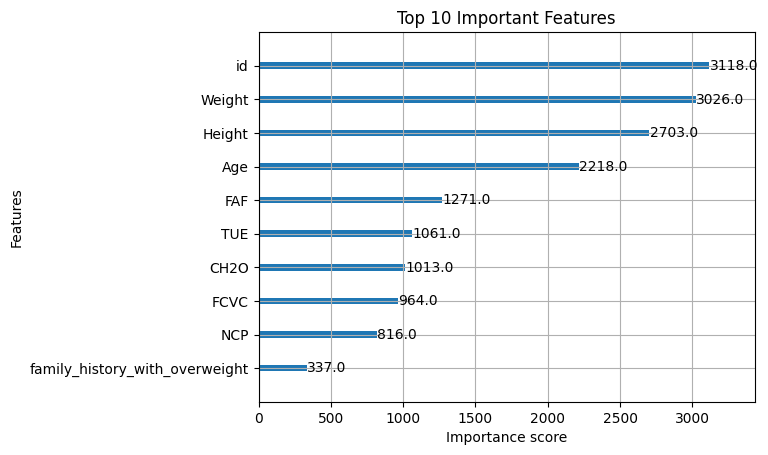

In [ ]:
plt.figure(figsize=(8,6))
xgb.plot_importance(xgb_model, max_num_features=10)
plt.title("Top 10 Important Features")
plt.show()

In [ ]:
predictions_encoded = xgb_model.predict(test_copy)
predictions_original = target_le.inverse_transform(predictions_encoded)

# Create a new DataFrame for the submission
submission_df = pd.DataFrame({
    'id': test_ids,
    'WeightCategory': predictions_original
})

submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

Submission file 'submission.csv' created successfully!


### **XGB with Kfold Cross Validation**

In [20]:
from sklearn.model_selection import StratifiedKFold
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax', # Objective function for multi-class classification
    num_class=num_classes,     # Specify number of classes
    n_estimators=400,
    learning_rate=0.01,
    subsample=0.9,
    reg_lambda= 1.0,
    reg_alpha= 0.05,
    min_child_weight= 4,
    gamma= 0.2,
    max_depth=6,
    colsample_bytree= 0.7,
    use_label_encoder=False,
    eval_metric='mlogloss'     # Evaluation metric for multi-class
)

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_accuracies = []

print(f"Starting {n_splits}-Fold Cross-Validation...\n")

for fold, (train_index, val_index) in enumerate(skf.split(X, y_encoded)):
    print(f"--- Fold {fold+1}/{n_splits} ---")

    # Split data; note we use .iloc to select rows from DataFrame by integer location
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    fold_accuracies.append(accuracy)
    print(f"Validation Accuracy for Fold {fold+1}: {accuracy:.4f}\n")
mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

print("--- Cross-Validation Summary ---")
print(f"Fold Accuracies: {[f'{acc:.4f}' for acc in fold_accuracies]}")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

Starting 5-Fold Cross-Validation...

--- Fold 1/5 ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:14:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Accuracy for Fold 1: 0.8983

--- Fold 2/5 ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:14:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Accuracy for Fold 2: 0.8996

--- Fold 3/5 ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:14:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Accuracy for Fold 3: 0.8993

--- Fold 4/5 ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:14:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Accuracy for Fold 4: 0.8979

--- Fold 5/5 ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:14:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Accuracy for Fold 5: 0.8983

--- Cross-Validation Summary ---
Fold Accuracies: ['0.8983', '0.8996', '0.8993', '0.8979', '0.8983']
Mean Accuracy: 0.8987
Standard Deviation of Accuracy: 0.0006


In [23]:
# without k_fold
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax', # Objective function for multi-class classification
    num_class=num_classes,     # Specify number of classes
    n_estimators=400,
    learning_rate=0.01,
    subsample=0.9,
    reg_lambda= 1.0,
    reg_alpha= 0.05,
    min_child_weight= 4,
    gamma= 0.2,
    max_depth=6,
    colsample_bytree= 0.7,
    use_label_encoder=False,
    eval_metric='mlogloss'     # Evaluation metric for multi-class
)
xgb_model.fit(X, y_encoded)
# y_pred_encoded = xgb_model.predict(X_test)
# accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
# print(f"Accuracy: {accuracy:.4f}")
predictions_encoded = xgb_model.predict(test_copy)
predictions_original = target_le.inverse_transform(predictions_encoded)

# Create a new DataFrame for the submission
submission_df = pd.DataFrame({
    'id': test_ids,
    'WeightCategory': predictions_original
})

submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:20:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Submission file 'submission.csv' created successfully!


In [21]:
# XGB + K-Fold Model CSV
predictions_encoded = xgb_model.predict(test_copy)
predictions_original = target_le.inverse_transform(predictions_encoded)

# Create a new DataFrame for the submission
submission_df = pd.DataFrame({
    'id': test_ids,
    'WeightCategory': predictions_original
})

submission_df.to_csv('submission.csv', index=False)

### **XGB Hyper Parameter Tuning using Randomized SearchCV**

In [18]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [200, 300, 400, 500, 600],
    "learning_rate": [0.01, 0.05, 0.1, 0.15],
    "max_depth": [4, 5, 6, 7, 8],
    "min_child_weight": [1, 2, 3, 4],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3],
    "reg_alpha": [0, 0.01, 0.05, 0.1],
    "reg_lambda": [0.5, 1.0, 1.5, 2.0]
}

# xgb_clf = xgb.XGBClassifier(
#     objective="multi:softprob",
#     num_class=num_classes,
#     eval_metric="mlogloss",
#     use_label_encoder=False,
#     random_state=42
# )

random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=40,
    scoring="accuracy",
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X, y_encoded)
print("\nBest Parameters from RandomizedSearchCV:")
print(random_search.best_params_)
print(f"Best CV Accuracy: {random_search.best_score_:.4f}")

# Evaluate on test split
# best_xgb = random_search.best_estimator_
# y_pred_best = best_xgb.predict(X_test)
# print(f"🎯 Test Accuracy after Random Search: {accuracy_score(y_test_encoded, y_pred_best):.4f}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:06:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Parameters from RandomizedSearchCV:
{'subsample': 0.9, 'reg_lambda': 1.0, 'reg_alpha': 0.05, 'n_estimators': 400, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.7}
Best CV Accuracy: 0.8993


In [ ]:
# predictions_encoded = best_xgb.predict(test_copy)
# predictions_original = target_le.inverse_transform(predictions_encoded)

# # Create a new DataFrame for the submission
# submission_df = pd.DataFrame({
#     'id': test_ids,
#     'WeightCategory': predictions_original
# })

# submission_df.to_csv('submission.csv', index=False)

# print("Submission file 'submission.csv' created successfully!")

### **Optuma**

In [ ]:
!pip install optuna

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import optuna

# --- Load Data ---
train_df = pd.read_csv(url)

# --- Preprocessing ---
target_col = "WeightCategory"
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                    'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Encode categorical variables
train_encoded = train_df.copy()
for col in categorical_cols + [target_col]:
    le = LabelEncoder()
    train_encoded[col] = le.fit_transform(train_encoded[col])

X = train_encoded[categorical_cols + numerical_cols]
y = train_encoded[target_col]

# --- Stratified Split ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- Define Optuna Objective Function ---
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 1500, 3000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.03, log=False),
        "max_depth": trial.suggest_int("max_depth", 6, 12),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 5),
        "gamma": trial.suggest_float("gamma", 0.1, 0.7, log=False),
        "subsample": trial.suggest_float("subsample", 0.6, 0.9, log=False),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 0.8, log=False),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.1, 1.0, log=False),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 1.0, log=False),
        "objective": "multi:softprob",  # Softprob gives probabilities
        "num_class": len(np.unique(y)), # Set dynamically based on your target 'y'
        "eval_metric": "mlogloss",
        "use_label_encoder": False,
        "n_jobs": -1,
        "random_state": 42
    }

    model = XGBClassifier(**params)

    # 5-fold Stratified Cross-validation for robustness
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    for train_idx, test_idx in skf.split(X_train, y_train):
        X_t, X_te = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_t, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]
        model.fit(X_t, y_t)
        preds = model.predict(X_te)
        scores.append(accuracy_score(y_te, preds))

    return np.mean(scores)

# --- Run Optuna Study ---
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, show_progress_bar=True)

# --- Train Best Model ---
best_params = study.best_params
print("\nBest Hyperparameters found by Optuna:")
for k, v in best_params.items():
    print(f"{k}: {v}")

best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print(f"\n📈 Validation Accuracy after Optuna Tuning: {acc * 100:.2f}%")

In [ ]:
final_model = XGBClassifier(**best_params)
final_model.fit(X, y_encoded)
predictions_encoded = final_model.predict(test_copy)
predictions_original = target_le.inverse_transform(predictions_encoded)

# Create a new DataFrame for the submission
submission_df = pd.DataFrame({
    'id': test_ids,
    'WeightCategory': predictions_original
})

submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

In [ ]:
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import joblib
import warnings
warnings.filterwarnings("ignore")

# ===============================================================
# DATA ASSUMPTIONS
# - X_train, X_test, y_train_encoded, y_test_encoded already exist
# - Features are numeric (binary/one-hot encoded)
# - Target is label-encoded
# ===============================================================

print("⚙️ Using CPU mode ('hist' tree method).")

# -------------------- OPTUNA OBJECTIVE --------------------
def objective(trial):
    params = {
        'objective': 'multi:softprob' if len(np.unique(y_train_encoded)) > 2 else 'binary:logistic',
        'eval_metric': 'mlogloss' if len(np.unique(y_train_encoded)) > 2 else 'logloss',
        'tree_method': 'hist',  # CPU optimized
        'use_label_encoder': False,
        'n_estimators': trial.suggest_int('n_estimators', 300, 2000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 15),
        'gamma': trial.suggest_float('gamma', 0.0, 10.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 20.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 20.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.5, 3.0),
        'random_state': 42,
        'verbosity': 0,
    }

    model = xgb.XGBClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train_encoded, cv=cv, scoring='accuracy', n_jobs=-1)
    return np.mean(scores)

# -------------------- OPTUNA STUDY CONFIG --------------------
study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42),
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=10)
)

# Run deeper tuning (increase n_trials for higher accuracy)
study.optimize(objective, n_trials=120, n_jobs=1, show_progress_bar=True)

print("\n====================== BEST TRIAL ======================")
print("Best CV Accuracy:", study.best_value)
print("Best Params:\n", study.best_params)
print("========================================================")

# -------------------- TRAIN FINAL MODEL --------------------
best_params = study.best_params
best_params.update({
    'objective': 'multi:softprob' if len(np.unique(y_train_encoded)) > 2 else 'binary:logistic',
    'eval_metric': 'mlogloss' if len(np.unique(y_train_encoded)) > 2 else 'logloss',
    'tree_method': 'hist',
    'use_label_encoder': False,
    'random_state': 42
})

final_model = xgb.XGBClassifier(**best_params)
final_model.fit(
    X_train, y_train_encoded,
    eval_set=[(X_test, y_test_encoded)],
    early_stopping_rounds=75,
    verbose=False
)

# -------------------- FINAL PERFORMANCE --------------------
y_pred = final_model.predict(X_test)
acc = accuracy_score(y_test_encoded, y_pred)
print(f"\n✅ Final Test Accuracy (Optimized): {acc:.4f}\n")
print(classification_report(y_test_encoded, y_pred))


In [ ]:
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(
    X_train, y_train_encoded,
    eval_set=[(X_test, y_test_encoded)],
    early_stopping_rounds=75,
    verbose=False
)
predictions_encoded = final_model.predict(test_copy)
predictions_original = target_le.inverse_transform(predictions_encoded)

# Create a new DataFrame for the submission
submission_df = pd.DataFrame({
    'id': test_ids,
    'WeightCategory': predictions_original
})

submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


# 1. Instantiate the XGBoost Classifier
# Set parameters that are not being tuned
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(pd.unique(y)), # Make sure num_class is set
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# 2. Define the grid of hyperparameters to search
# This is a dictionary where keys are the parameter names and values are the settings to try.
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# 3. Set up the GridSearchCV object
# cv=5 means 5-fold cross-validation will be used.
# n_jobs=-1 uses all available CPU cores to speed up the process.
# verbose=3 provides detailed output during the search.
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=3
)

# 4. Run the grid search on your data
print("Starting Grid Search...")
grid_search.fit(X, y)
print("Grid Search complete.")

# 5. Print the best results
print("\n--- Best Parameters Found ---")
print(grid_search.best_params_)

print("\n--- Best Cross-Validation Score (Accuracy) ---")
print(f"{grid_search.best_score_:.4f}")

# You can also access the best model directly
best_model = grid_search.best_estimator_